# CUSTOMER CHURN RATE - GROUP 4

In [5]:
author

,Name,Roll No
1,Vu Truong,BS20DSY037
2,Quang Huynh,BS20DSY027
3,Anh Ngo,BS20DSY035
4,Thanh Nguyen,BS20DSY029


=====================================================================================================================

## INTRODUCTION

The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period. A high churn rate could adversely affect profits and impede growth. Therefore, companies have to minimize the customer churn rate to keep going.

For most companies, to pretend being faced up the situation of sudden contract cancelling of customers from occuring, they can aternatively identify and predict who would stop using services within an amount of time, so that they can motivate him/her, or be well-prepared when he/she takes actions.

This project was constructed to deal with the problem above.

------------------------------------------------------------------------------------------------------------------------------

## DATA DICTIONARY

In this project, we distinguished customers by using their:

  **CustomerID**

  **Surname**

We mainly focus on 10 attributes which are believed to significantly effect the Customer Churn Rate:

  **CreditScore**: Customers' credit score

  **Geography**: Country of living

  **Gender**: Male or Female

  **Age**: Customers' age

  **Tenure**: Time of bond with company (month)

  **Balance**: Amount left with a customer

  **NumOfProducts**: Number of product customers own (0: No, 1: Yes)

  **HasCrCard**: Whether or a customer have a credit Card (0: No, 1: Yes)

  **IsActiveMember**: Whether or not a customer is an active member (0: No, 1: Yes)

  **EstimatedSalary**: Salary estimation of a customer
  
Target:

  **Exited**: Whether or not a customer have already left (0: No, 1: Yes)


------------------------------------------------------------------------------------------------------------------------------

## DATA COLLECTION

The dataset used for this project was taken from Kaggle.

Author: **Shubham Kumar** - National Institute of technology Jamshedpur - Jamshedpur, Jharkhand, India

**https://www.kaggle.com/shubh0799/churn-modelling**

------------------------------------------------------------------------------------------------------------------------------

## PROBLEM APPROACH

**Classic Binary Classification**

With the dataset of 10,000 rows of information, we will do classification by:

1. Understanding the data

2. Clean the data: deal with non-numeric variables

3. Removing outliers

4. Fiting data in to models, finding the best models


------------------------------------------------------------------------------------------------------------------------------

## TABLE OF CONTENTS

***I) DATA EXPLORATION:***

1. IMPORT LIBRARIES AND DATASET

2. GENERAL DESCRIPTION

3. CORRELATION MATRIX

4. EXPLORATORY DATA ANALYSIS

***II) DATA CLEANING AND PREPROCESSING:***

1. DATA CLEANING

2. DEALING WITH OUTLIERS

***III) TESTING MULTIPLE MODELS***

1. SPLITTING THE DATASET

2. BUILDING AND TESTING MODEL

3. ROC CURVE FOR COMPARISION

4. PRECISION - RECALL CURVE

5. CHOOSING MODELS

***IV) FIT MODELS***

- A - LINEAR DISCRIMINANT ANALYSIS

- B - LOGISTIC REGRESSION

- C - GAUSSIAN NAIVE BAYES
    
***V) CONCLUSION***

***VI) ADDITIONAL INFORMATION***

1. LDA REDUCED MODEL

2. DECISION TREE MODEL

3. DEFINING THRESHOLD

=========================================================================================================================

# I) DATA EXPLORATION

**1) IMPORT LIBRARIES AND DATASET**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("Churn_Modelling.csv")

df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


**2) GENERAL DESCRIPTION**

In [8]:
df.shape

(10000, 14)

We remove 3 columns: 'RowNumber', 'CustomerId', 'Surname' since they have no effect on the target variable

In [9]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


There is no missing value and 2 non-numeric columns in this dataset

In [11]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df[['Geography','Gender']].describe()

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


**3) CORRELATION MATRIX**

In [13]:
cor_matrix=df.corr().round(decimals=1)
cor_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
Age,-0.0,1.0,-0.0,0.0,-0.0,-0.0,0.1,-0.0,0.3
Tenure,0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
Balance,0.0,0.0,-0.0,1.0,-0.3,-0.0,-0.0,0.0,0.1
NumOfProducts,0.0,-0.0,0.0,-0.3,1.0,0.0,0.0,0.0,-0.0
HasCrCard,-0.0,-0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0
IsActiveMember,0.0,0.1,-0.0,-0.0,0.0,-0.0,1.0,-0.0,-0.2
EstimatedSalary,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,1.0,0.0
Exited,-0.0,0.3,-0.0,0.1,-0.0,-0.0,-0.2,0.0,1.0


<AxesSubplot:>

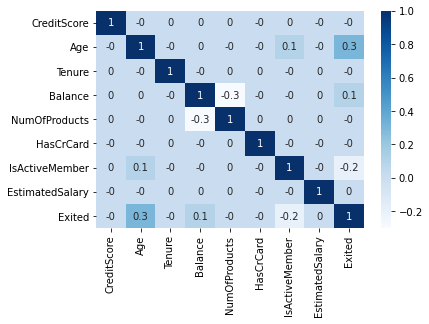

In [14]:
sns.heatmap(cor_matrix, annot = True, cmap='Blues')

*Most attributes are independent to each other, except Balance and NumOfProducts*

**4) EXPLORATORY DATA ANALYSIS**

We divide independent variables into 2 groups: numeric and categorical in order to draw appropriate graph for each

**Numeric: CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary**

**Categorical: HasCrCard, IsActiveMember, Gender, Geography**


### Numeric

#### Histogram

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


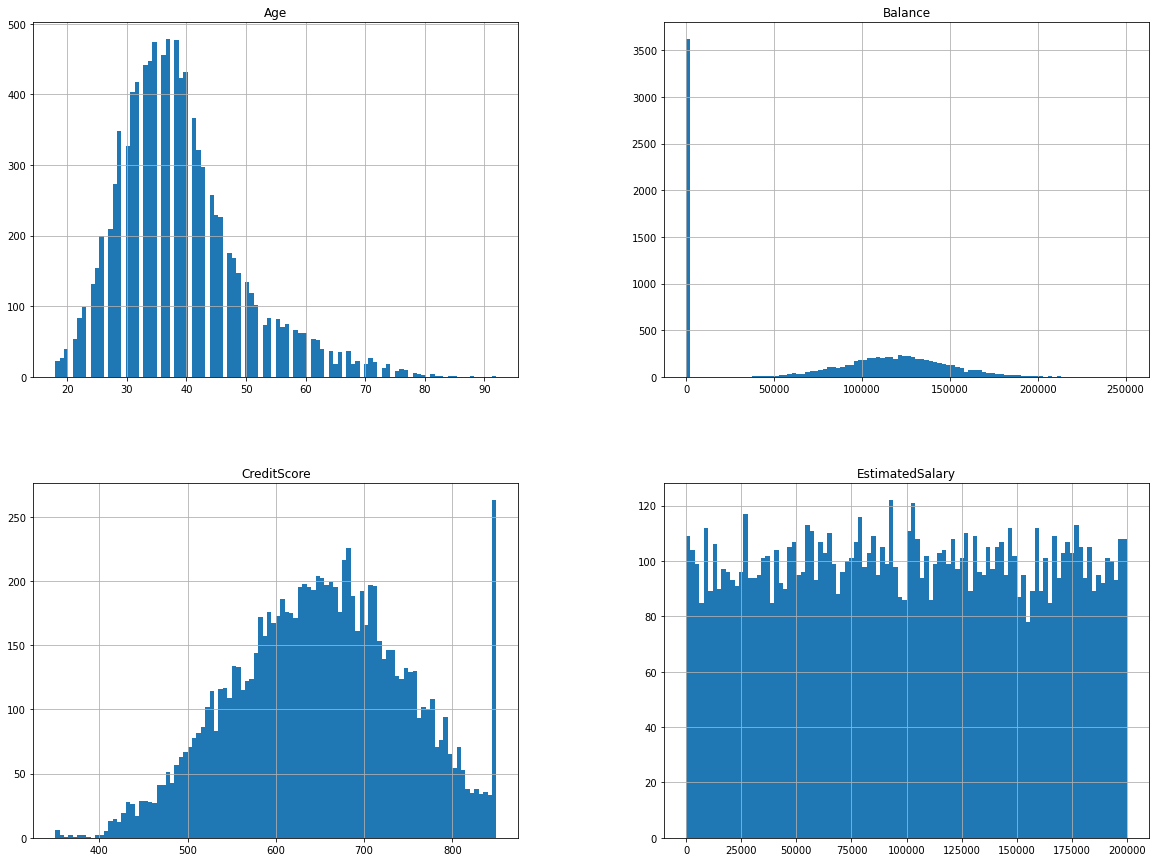

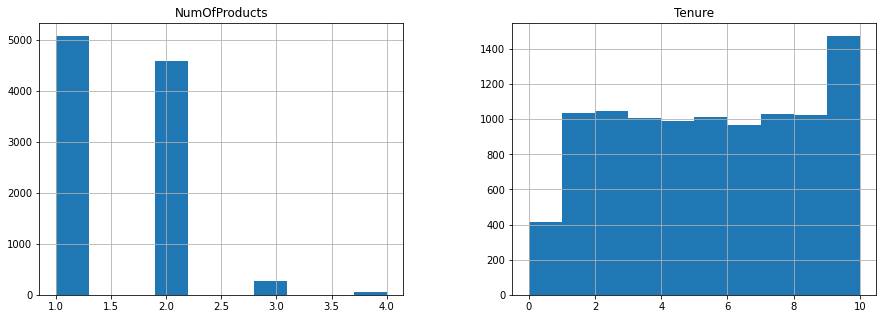

In [15]:
df.hist(column = ['CreditScore','Age','Balance','EstimatedSalary'],bins=100, figsize=(20, 15))
df.hist(column = ['Tenure','NumOfProducts'], figsize = (15,5))
plt.show()

The histogram illustrates the shape of each variable:
- Adult customers (25-45) is popular in this dataset
- Above 1/3 number of customer has no money left with them

#### Boxplot

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


CreditScore           AxesSubplot(0.125,0.657941;0.352273x0.222059)
Age                AxesSubplot(0.547727,0.657941;0.352273x0.222059)
Balance               AxesSubplot(0.125,0.391471;0.352273x0.222059)
EstimatedSalary    AxesSubplot(0.547727,0.391471;0.352273x0.222059)
Tenure                   AxesSubplot(0.125,0.125;0.352273x0.222059)
NumOfProducts         AxesSubplot(0.547727,0.125;0.352273x0.222059)
dtype: object

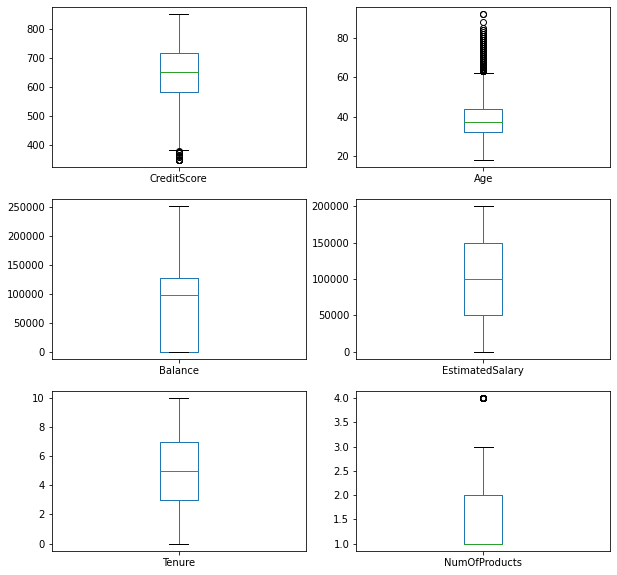

In [16]:
df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary','Tenure','NumOfProducts']].plot.box(subplots = True, layout=(3,2), figsize=(10, 10))

The box plot tells us the median, interquantile range as well as outlier (if possible). We can notice Age has the highest outliers, followed by CreditScore and NumOfProducts

### Categorical

#### Bar chart

We plot char chart for categorical variable which is group by 'Exited' variable

<AxesSubplot:xlabel='Exited', ylabel='count'>

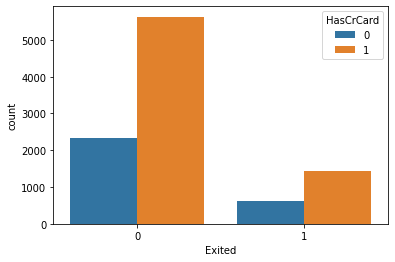

In [17]:
sns.countplot(x='Exited', hue='HasCrCard', data=df)

<AxesSubplot:xlabel='Exited', ylabel='count'>

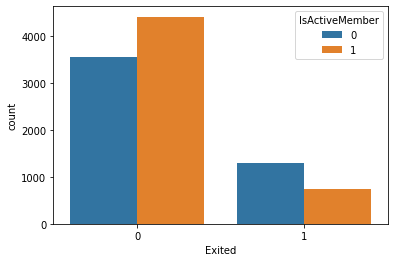

In [18]:
sns.countplot(x='Exited', hue='IsActiveMember', data=df)

<AxesSubplot:xlabel='Exited', ylabel='count'>

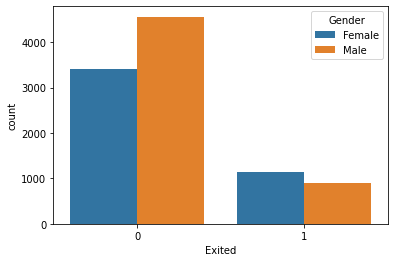

In [19]:
sns.countplot(x='Exited', hue='Gender', data=df)

The ratio of Male and Female in exited customer is nearly 1

<AxesSubplot:xlabel='Exited', ylabel='count'>

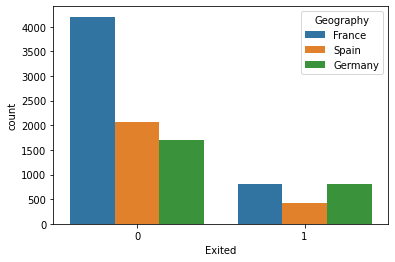

In [20]:
sns.countplot(x='Exited', hue='Geography', data=df)

In [21]:
df.groupby('Exited').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


- On average, customers who had left had higher Balance than that of those who had stayed.
- Younger customers tended to stay compared to older customers.
- The time interact (Tenure) with company seems to have no effect on customer's decision.

# II) DATA CLEANING AND PREPROCESSING

**1) DATA CLEANING**

##### Gender

Gender has 2 unique values Male and Female. We convert it into binary numbers which 0 and 1 represent for Female and Male respectively.

In [22]:
df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0)

df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1
6,822,France,1,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0
9,684,France,1,27,2,134603.88,1,1,1,71725.73,0


##### Geography

There are 3 countries in Geography: France, Germany and Spain. We use dummy variable to convert into indicator variable.

In [23]:
country_dummies = pd.get_dummies(df['Geography'])

country_dummies.head(10)

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0
7,0,1,0
8,1,0,0
9,1,0,0


In [24]:
df = pd.DataFrame.join(df, country_dummies)

df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,822,France,1,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,France,1,27,2,134603.88,1,1,1,71725.73,0,1,0,0


Since we have 3 new columns represent for countries, we remove 'Geography' from our dataset.

When considering France, Germany, Spain, one is dependent on the rest of two. It means that when the value of France and Germany is known, we can easily determine such value for Spain. Then we can randomly drop one of three columns. In this case, we drop Spain.

In [25]:
df.drop(['Geography', 'Spain'], axis=1, inplace=True)

df.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
5,645,1,44,8,113755.78,2,1,0,149756.71,1,0,0
6,822,1,50,7,0.00,2,1,1,10062.80,0,1,0
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0,1
8,501,1,44,4,142051.07,2,0,1,74940.50,0,1,0
9,684,1,27,2,134603.88,1,1,1,71725.73,0,1,0


We check information again to make sure that all data type are numeric

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int32  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
 10  France           10000 non-null  uint8  
 11  Germany          10000 non-null  uint8  
dtypes: float64(2), int32(1), int64(7), uint8(2)
memory usage: 761.8 KB


**2) DEALING WITH OUTLIERS**

In [27]:
from scipy import stats

In [28]:
for i in df.columns:
    print(i, ':', len(df[np.abs(stats.zscore(df[i])) > 3][i]))

CreditScore : 8
Gender : 0
Age : 133
Tenure : 0
Balance : 0
NumOfProducts : 60
HasCrCard : 0
IsActiveMember : 0
EstimatedSalary : 0
Exited : 0
France : 0
Germany : 0


There are totally 201 outliers we need to deal with

The box plot of columns which has outliers:

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


CreditScore         AxesSubplot(0.125,0.125;0.227941x0.755)
Age              AxesSubplot(0.398529,0.125;0.227941x0.755)
NumOfProducts    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

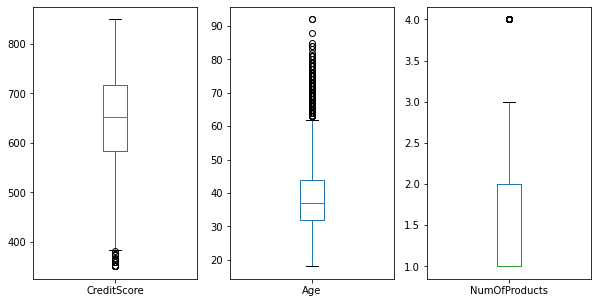

In [29]:
df[['CreditScore', 'Age','NumOfProducts']].plot.box(subplots = True, layout=(1,3), figsize=(10, 5))

We deal with outliers by deleting rows which have value more than 3 standard deviation from the mean. In other words, the row is remained when absolute Z-score is less than 3

In [30]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1


As the result, there are only 9799 sample left and 201 instances that do not meet standards, are classified as extreme outliers and removed from the  dataset (2% reduction)

*reindex*

After deleting outliers, we reset index to avoid miss-indexing

In [31]:
index=pd.Index([i for i in range(9799)])

df.index = index

df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9794,771,1,39,5,0.00,2,1,0,96270.64,0,1,0
9795,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0
9796,709,0,36,7,0.00,1,0,1,42085.58,1,1,0
9797,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1


# III) TESTING MULTIPLE MODELS

**1) SPLITTING THE DATASET INTO TRAINING SET AND TEST SET WITH RATIO 0.75:0.25 RESPECTIVELY**

In [32]:
from sklearn.model_selection import train_test_split
X = df.drop('Exited',axis = 1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

**2) BUILDING AND TESTING MODELS**

To avoid overfitting, we use 10 fold cross validation to estimate accuracy. This will split the dataset into 10 parts, in which 9 parts for training and the remaining one for testing. 

We use the metric of 'accuracy' to evaluate models. This is a ratio of the number of correctly predicted instances divide by the total number of instances in the dataset multiplied by 100 to get an accuracy percentage.

In [33]:
# Import all the functions and objects we want to test
from sklearn import model_selection
from sklearn.metrics import classification_report # Reporting metric
from sklearn.metrics import confusion_matrix # classifies predicted values as TP, TN, FP, FN
from sklearn.metrics import accuracy_score # calculates accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [34]:
# Evaluate each model in turn
results=[]
names=[]
seed=7

models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('CARD',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LR:0.794666(0.017161)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


CARD:0.783371(0.013357)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN:0.766501(0.016740)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LDA:0.821609(0.016795)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


NB:0.794803(0.018506)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVM:0.798477(0.018555)


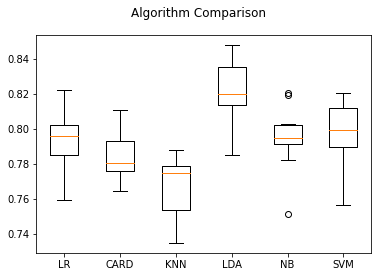

In [35]:
# Compare accuracy using boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

It looks like that using this comparison method, all the models have accuracy score above 76%, which is very high. 

**Howewer, this high accuracy is of no use.** 

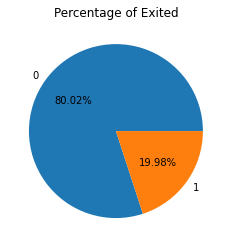

In [36]:
plt.pie(df['Exited'].value_counts(), autopct = '%1.2f%%', labels=[0, 1])
plt.title('Percentage of Exited')
plt.show()

As you can see above, number of customers who exited is approximately 20%, which is 4 times lower than those who do not exited. Hence, the dataset we use has unbalanced classes. That is the reason why the accuracy metric is not of much use here.

**3) ROC CURVE FOR COMPARISION**

This is a method that can accommodate uncertainty by showing the entire space of performance possibilities. We plot a two-dimensional space of a classifier with false positive rate on the x axis against true positive rate on the y axis.

ROC graph depicts relative trade-offs that a classifier makes between benefits (true positives) and costs (false positives)

In [37]:
#Define x and y axis
x = X_train
y_true = np.array(y_train)

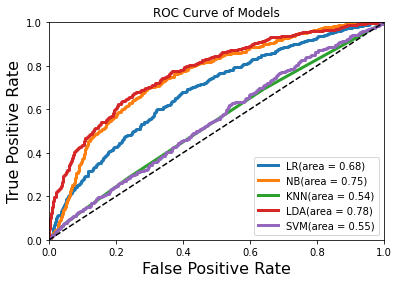

<Figure size 720x432 with 0 Axes>

In [38]:
#import functions
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_val_predict

# Logistic Regression
lr = LogisticRegression()
lr.fit(x,y_true)
y_score_lr = cross_val_predict(lr, X_test, y_test, method='decision_function',cv=10)
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,y_score_lr)

# GaussianNB
gnb = GaussianNB()
gnb.fit(x,y_true)
gnb_results = cross_val_score(gnb,X_test, y_test,scoring='accuracy')
y_score_gnb = cross_val_predict(gnb,X_test, y_test,method='predict_proba',cv=10)
fpr_gnb, tpr_gnb, threshold_gnb = roc_curve(y_test,y_score_gnb[:,1])

# K Neighbor Classifier
knc = KNeighborsClassifier()
knc.fit(x,y_true)
knc_results = cross_val_score(knc,X_test, y_test,scoring='accuracy')
y_score_knn = cross_val_predict(knc,X_test, y_test,method='predict_proba',cv=10)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test,y_score_knn[:,1])

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(x,y_true)
lda_results = cross_val_score(lda,X_test, y_test,scoring='accuracy')
y_score_lda = cross_val_predict(lda,X_test, y_test,method='predict_proba',cv=10)
fpr_lda, tpr_lda, threshold_lda = roc_curve(y_test,y_score_lda[:,1])

# SVC
svc = SVC(probability = True)
svc.fit(x,y_true)
svc_results = cross_val_score(svc,X_test, y_test,scoring='accuracy')
y_score_svc = cross_val_predict(svc,X_test, y_test,method='decision_function',cv=10)
fpr_svc, tpr_svc, threshold_svc = roc_curve(y_test,y_score_svc)


# ROC Curve for the models above
plt.plot(fpr_lr, tpr_lr, linewidth = 3, label='LR(area = %0.2f)' % roc_auc_score(y_test,y_score_lr))
plt.plot(fpr_gnb, tpr_gnb, linewidth = 3, label='NB(area = %0.2f)' % roc_auc_score(y_test,y_score_gnb[:,1]))
plt.plot(fpr_knn, tpr_knn, linewidth = 3, label='KNN(area = %0.2f)' % roc_auc_score(y_test,y_score_knn[:,1]))
plt.plot(fpr_lda, tpr_lda, linewidth = 3, label='LDA(area = %0.2f)' % roc_auc_score(y_test,y_score_lda[:,1]))
plt.plot(fpr_svc, tpr_svc, linewidth = 3, label='SVM(area = %0.2f)' % roc_auc_score(y_test,y_score_svc))


plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve of Models')
plt.figure(figsize=(10, 6))
plt.show()

Using AUC, we can sort the models from the best to the poorest in terms of performance as below: 
1. LDA
2. NB
3. LR
4. SVM
5. KNN

**4) PRECISION - RECALL CURVE**

Similar to ROC curve, Precision-Recall curve is used to evaluate classifier output quality. We plot a two-dimensional space of a classifier with recall rate on the x axis against precision rate on the y axis.

Precision - Recall graph depicts relative trade-offs that a classifier makes between precision and recall.

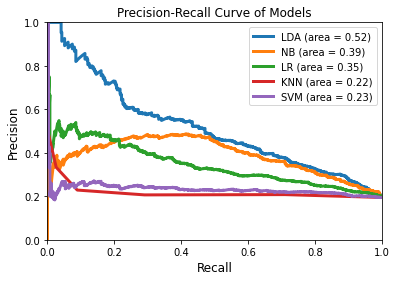

<Figure size 1080x1080 with 0 Axes>

In [39]:
# import functions
from sklearn.metrics import plot_roc_curve, precision_recall_curve, roc_curve, auc, f1_score

#LDA
lda_precision, lda_recall, threshold = precision_recall_curve(y_test, lda.predict_proba(X_test)[:,1])
lda_f1 = f1_score(y_test,lda.predict(X_test))
lda_roc_auc = auc(lda_recall, lda_precision)

#NB
gnb_precision, gnb_recall, threshold = precision_recall_curve(y_test, gnb.predict_proba(X_test)[:,1])
gnb_f1 = f1_score(y_test,gnb.predict(X_test))
gnb_roc_auc = auc(gnb_recall, gnb_precision)

#LR
lr_precision, lr_recall, threshold = precision_recall_curve(y_test, lr.predict_proba(X_test)[:,1])
lr_f1 = f1_score(y_test,lr.predict(X_test))
lr_roc_auc = auc(lr_recall, lr_precision)

#KNN
knc_precision, knc_recall, threshold = precision_recall_curve(y_test, knc.predict_proba(X_test)[:,1])
knc_f1 = f1_score(y_test,knc.predict(X_test))
knc_roc_auc = auc(knc_recall, knc_precision)

#SVC
svc_precision, svc_recall, threshold = precision_recall_curve(y_test, svc.predict_proba(X_test)[:,1])
svc_f1 = f1_score(y_test,svc.predict(X_test))
svc_roc_auc = auc(svc_recall, svc_precision)

# Precision - Recall Curve for the models above
plt.plot(lda_recall, lda_precision, linewidth = 3,label = 'LDA (area = %0.2f)' % lda_roc_auc)
plt.plot(gnb_recall, gnb_precision, linewidth = 3,label = 'NB (area = %0.2f)' % gnb_roc_auc)
plt.plot(lr_recall, lr_precision, linewidth = 3,label = 'LR (area = %0.2f)' % lr_roc_auc)
plt.plot(knc_recall, knc_precision, linewidth = 3,label = 'KNN (area = %0.2f)' % knc_roc_auc)
plt.plot(svc_recall, svc_precision, linewidth = 3,label = 'SVM (area = %0.2f)' % svc_roc_auc)


plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Recall',fontsize = 12)
plt.ylabel('Precision',fontsize = 12)
plt.title('Precision-Recall Curve of Models')
plt.legend(loc = "upper right")
plt.figure(figsize = (15,15))
plt.show()

Using AUC, we can also sort the models from the best to the poorest in terms of performance as below: 
1. LDA
2. NB
3. LR
4. SVM
5. KNN

**5) CHOOSING MODELS**

From those two graphs above, it can be easily seen that SVM and KNN model have the poorest performance (4th and 5th position respectively). Therefore, we will pick the remaining three models to train and make predictions.

# IV) FIT MODELS

**In this dataset,**
- False Positive means person actual not Exited but the model predicts Exited
- False Negative means person actual Exited but the model predicts not Exited

**In churn problem, the False Negative is more important than False Positive. Therefore, our objective is to increase Recall.**

**A - LINEAR DISCRIMINANT ANALYSIS**

In [40]:
ldamodel = LinearDiscriminantAnalysis()
ldamodel.fit(X_train, y_train) #fit training data X and Y to obtain a Logistic regression model 

LinearDiscriminantAnalysis()

In [41]:
print(ldamodel.classes_)
print(ldamodel.intercept_)
pd.DataFrame(ldamodel.coef_.T, X.columns, columns = ['Coeff'])

[0 1]
[-4.09773438]


,Coeff
CreditScore,-4.897031e-04
Gender,-5.779125e-01
Age,9.857703e-02
Tenure,-1.333484e-02
Balance,1.267220e-06
NumOfProducts,-3.836744e-01
HasCrCard,-3.073800e-02
IsActiveMember,-9.880782e-01
EstimatedSalary,5.975045e-07
France,-6.681504e-02


In [42]:
ldamodel.predict_proba(X_test)

array([[0.97891506, 0.02108494],
       [0.91287517, 0.08712483],
       [0.96844528, 0.03155472],
       ...,
       [0.8329088 , 0.1670912 ],
       [0.91259979, 0.08740021],
       [0.51237452, 0.48762548]])

In [43]:
confusion_matrix(y_test, ldamodel.predict(X_test))

array([[1884,   89],
       [ 347,  130]], dtype=int64)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

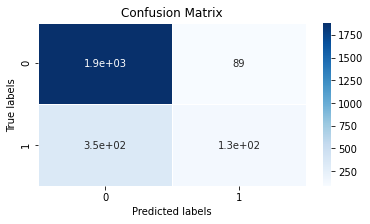

In [44]:
#Linear Discriminant Analysis
cm1=confusion_matrix(y_test,ldamodel.predict(X_test))
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm1, annot=True, ax = ax,linewidths=.5, cmap='Blues') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [45]:
LDAreport = classification_report(y_test, ldamodel.predict(X_test))
print(LDAreport)

              precision    recall  f1-score   support

           0       0.84      0.95      0.90      1973
           1       0.59      0.27      0.37       477

    accuracy                           0.82      2450
   macro avg       0.72      0.61      0.63      2450
weighted avg       0.80      0.82      0.79      2450



**B - LOGISTIC REGRESSION**

In [46]:
Logisticmodel = LogisticRegression() #create instance of Logistic Regression with penalty=l2 by default
Logisticmodel.fit(X_train, y_train) #fit training data X and Y to obtain a Logistic regression model

LogisticRegression()

In [47]:
print(Logisticmodel.classes_)
print(Logisticmodel.intercept_)
pd.DataFrame(Logisticmodel.coef_.T, X.columns, columns = ['Coeff'])

[0 1]
[-0.00025023]


,Coeff
CreditScore,-0.005581
Gender,-0.001271
Age,0.053135
Tenure,-0.002197
Balance,0.000003
NumOfProducts,-0.001099
HasCrCard,-0.000235
IsActiveMember,-0.001690
EstimatedSalary,-0.000001
France,-0.001013


In [48]:
Logisticmodel.predict_proba(X_test)

array([[0.92855401, 0.07144599],
       [0.80125258, 0.19874742],
       [0.77694812, 0.22305188],
       ...,
       [0.62276663, 0.37723337],
       [0.73360707, 0.26639293],
       [0.70167381, 0.29832619]])

In [49]:
confusion_matrix(y_test, Logisticmodel.predict(X_test))

array([[1920,   53],
       [ 430,   47]], dtype=int64)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

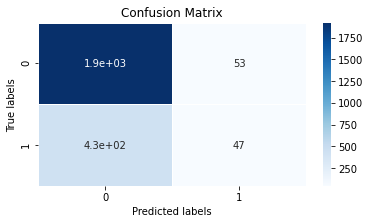

In [50]:
#Logistic Regression
cm2=confusion_matrix(y_test, Logisticmodel.predict(X_test))
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm2, annot=True, ax = ax,linewidths=.5, cmap='Blues') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [51]:
#Classification report
Logisticreport = classification_report(y_test, Logisticmodel.predict(X_test))
print(Logisticreport)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1973
           1       0.47      0.10      0.16       477

    accuracy                           0.80      2450
   macro avg       0.64      0.54      0.53      2450
weighted avg       0.75      0.80      0.75      2450



**C - GAUSSIAN NAIVE BAYES**

In [52]:
NBmodel = GaussianNB()
NBmodel.fit(X_train,y_train)

GaussianNB()

In [53]:
NBmodel.predict_proba(X_test)

array([[0.93612029, 0.06387971],
       [0.89428886, 0.10571114],
       [0.870792  , 0.129208  ],
       ...,
       [0.80411267, 0.19588733],
       [0.9032408 , 0.0967592 ],
       [0.50651063, 0.49348937]])

In [54]:
NBMatrix = confusion_matrix(y_test, NBmodel.predict(X_test))
NBMatrix

array([[1876,   97],
       [ 402,   75]], dtype=int64)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

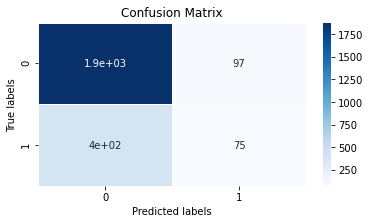

In [55]:
# Gaussian naive bayes
cm3 = confusion_matrix(y_test, NBmodel.predict(X_test))
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm3, annot=True, ax = ax,linewidths=.5, cmap='Blues'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [56]:
#Classification report
NBreport = classification_report(y_test, NBmodel.predict(X_test))
print(NBreport)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1973
           1       0.44      0.16      0.23       477

    accuracy                           0.80      2450
   macro avg       0.63      0.55      0.56      2450
weighted avg       0.75      0.80      0.76      2450



# V) CONCLUSION

**Using classification report, we can also sort the models from the best to the poorest in terms of recall score as below:**

1. **LDA: 0.27**
2. NB: 0.16
3. LR: 0.1

**LDA takes the highest position on Recall score - 0.27, then we choose 0.27 as the baseline**

**Below are some methods to achive higher recall score**

# VI) Additional Information

**1) LDA REDUCED MODEL**

For parts above, we fit all the features to predict the target: EXITED. However, some of features may be not important or interact each other and cause multilinearity and overfitting. Below, we check their importance and reduce the model.

In [63]:
# print all the coefficient again
df1 = pd.DataFrame(ldamodel.coef_.T, X.columns, columns = ['Coeff'])
df1

,Coeff
CreditScore,-4.897031e-04
Gender,-5.779125e-01
Age,9.857703e-02
Tenure,-1.333484e-02
Balance,1.267220e-06
NumOfProducts,-3.836744e-01
HasCrCard,-3.073800e-02
IsActiveMember,-9.880782e-01
EstimatedSalary,5.975045e-07
France,-6.681504e-02


We construct X_Design
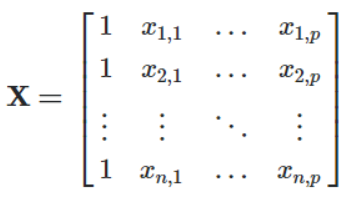

We construct matrix of covariates
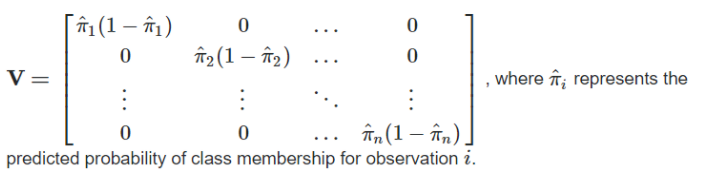

In [64]:
## add column of 1's at the beginning of your X_train matrix
X_design = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
print(X_design.shape)

# Initiate matrix of 0's, fill diagonal with each predicted observation's variance
predProbs = ldamodel.predict_proba(X_train)
V = np.diagflat(np.product(predProbs, axis=1))
print(V)

(7349, 12)
[[0.13350396 0.         0.         ... 0.         0.         0.        ]
 [0.         0.23181253 0.         ... 0.         0.         0.        ]
 [0.         0.         0.22717775 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.10566513 0.         0.        ]
 [0.         0.         0.         ... 0.         0.21560245 0.        ]
 [0.         0.         0.         ... 0.         0.         0.02375297]]


The we calculate standard deviation of parameter as below
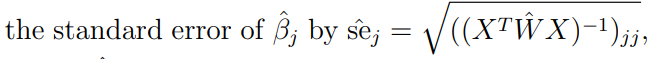
where W hat = V

In [65]:
# Covariance matrix
covLDA = np.linalg.inv(np.dot(np.dot(X_design.T, V), X_design))

In [66]:
#Calculate sd
parameters_sd = np.sqrt(np.diag(covLDA))
print("Standard errors: ", parameters_sd)

parameters_sd = parameters_sd.reshape(12,1)

Standard errors:  [3.12430616e-01 3.40833175e-04 6.59844221e-02 3.52909619e-03
 1.13276894e-02 6.31277554e-07 6.23601589e-02 7.16709652e-02
 6.90339225e-02 5.75841664e-07 8.54788995e-02 9.48048118e-02]


In [67]:
df1['Sd'] = parameters_sd[1:]
df1

,Coeff,Sd
CreditScore,-4.897031e-04,3.408332e-04
Gender,-5.779125e-01,6.598442e-02
Age,9.857703e-02,3.529096e-03
Tenure,-1.333484e-02,1.132769e-02
Balance,1.267220e-06,6.312776e-07
NumOfProducts,-3.836744e-01,6.236016e-02
HasCrCard,-3.073800e-02,7.167097e-02
IsActiveMember,-9.880782e-01,6.903392e-02
EstimatedSalary,5.975045e-07,5.758417e-07
France,-6.681504e-02,8.547890e-02


We use Wald Statistic to do the hypothesis test (following chi square distribution with df=1)
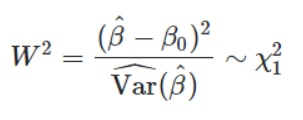

In [68]:
# Wald statistic (coefficient / s.e.) 
logitParams = np.insert(ldamodel.coef_, 0, ldamodel.intercept_)
chi = (logitParams / np.sqrt(np.diag(covLDA))) ** 2
print("Wald statistics: ", chi)

Wald statistics:  [1.72020591e+02 2.06434393e+00 7.67081099e+01 7.80233313e+02
 1.38577659e+00 4.02961574e+00 3.78539568e+01 1.83935163e-01
 2.04860167e+02 1.07665393e+00 6.10985139e-01 9.76052520e+01]


In [69]:
df1['Chi square'] = chi[1:]

df1

,Coeff,Sd,Chi square
CreditScore,-4.897031e-04,3.408332e-04,2.064344
Gender,-5.779125e-01,6.598442e-02,76.708110
Age,9.857703e-02,3.529096e-03,780.233313
Tenure,-1.333484e-02,1.132769e-02,1.385777
Balance,1.267220e-06,6.312776e-07,4.029616
NumOfProducts,-3.836744e-01,6.236016e-02,37.853957
HasCrCard,-3.073800e-02,7.167097e-02,0.183935
IsActiveMember,-9.880782e-01,6.903392e-02,204.860167
EstimatedSalary,5.975045e-07,5.758417e-07,1.076654
France,-6.681504e-02,8.547890e-02,0.610985


In [70]:
df1['Prob > Chi']=(1-stats.chi2.cdf(df1['Chi square'] , 1)).round(4)
df1

,Coeff,Sd,Chi square,Prob > Chi
CreditScore,-4.897031e-04,3.408332e-04,2.064344,0.1508
Gender,-5.779125e-01,6.598442e-02,76.708110,0.0000
Age,9.857703e-02,3.529096e-03,780.233313,0.0000
Tenure,-1.333484e-02,1.132769e-02,1.385777,0.2391
Balance,1.267220e-06,6.312776e-07,4.029616,0.0447
NumOfProducts,-3.836744e-01,6.236016e-02,37.853957,0.0000
HasCrCard,-3.073800e-02,7.167097e-02,0.183935,0.6680
IsActiveMember,-9.880782e-01,6.903392e-02,204.860167,0.0000
EstimatedSalary,5.975045e-07,5.758417e-07,1.076654,0.2994
France,-6.681504e-02,8.547890e-02,0.610985,0.4344


Choosing alpha = 0.025, the we choose parameters having (Prob > Chi) < 0.025 and fit model again. 

They are:
**'Gender', 'Age', 'NumOfProducts', 'IsActiveMember', 'Germany'**

In [71]:
X_train1 = X_train[['Gender','Age','NumOfProducts','IsActiveMember','Germany']]
X_test1 = X_test[['Gender','Age','NumOfProducts','IsActiveMember','Germany']]

In [72]:
LAmodel2 = LinearDiscriminantAnalysis()

In [73]:
LAmodel2.fit(X_train1,y_train)

LinearDiscriminantAnalysis()

In [74]:
print(LAmodel2.score(X_test1, y_test))

0.8228571428571428


In [75]:
Logisticmatrix1 = confusion_matrix(y_test, LAmodel2.predict(X_test1))
Logisticmatrix1

array([[1885,   88],
       [ 346,  131]], dtype=int64)

In [76]:
LDAreport1 = classification_report(y_test, LAmodel2.predict(X_test1))
print(LDAreport1)

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1973
           1       0.60      0.27      0.38       477

    accuracy                           0.82      2450
   macro avg       0.72      0.62      0.64      2450
weighted avg       0.80      0.82      0.80      2450



From the report and confusion matrix, we can see that the model just improves a liitle bit (accuracy score, precision increases), the model help us reduce cost and time to collect data and fit the model (only 5 features needed comparing to 11). Also, they would modify the severity of interaction, multilinearity and overfitting when using too many features

**2) DECISION TREE MODEL**

In [77]:
from sklearn.tree import plot_tree
from sklearn.metrics import f1_score

Let we calculate the depth nodes should be splitted to maintain high accruacy and avoid overfitting

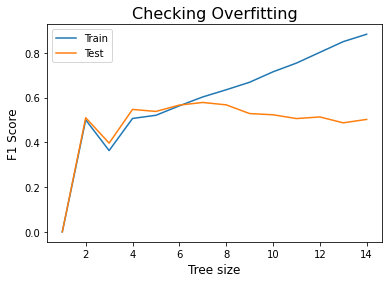

In [78]:
max_d = [i for i in range(1,15)]
score_train = []
score_test = []
for i in max_d:
    k = DecisionTreeClassifier(criterion = 'entropy', max_depth=i)
    k.fit(X_train,y_train)
    score_train.append(f1_score(y_train,k.predict(X_train)))
    score_test.append(f1_score(y_test,k.predict(X_test)))
    
plt.plot(max_d,score_train, label = 'Train')
plt.plot(max_d,score_test, label = 'Test')
plt.xlabel('Tree size',fontsize = 12)
plt.ylabel('F1 Score',fontsize = 12)
plt.title('Checking Overfitting', fontsize = 16)
plt.legend()

In [79]:
np.argmax(score_test)+1

7

We choose max_depth = 7 because at this point, the test set has the highest f1 score

In [80]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

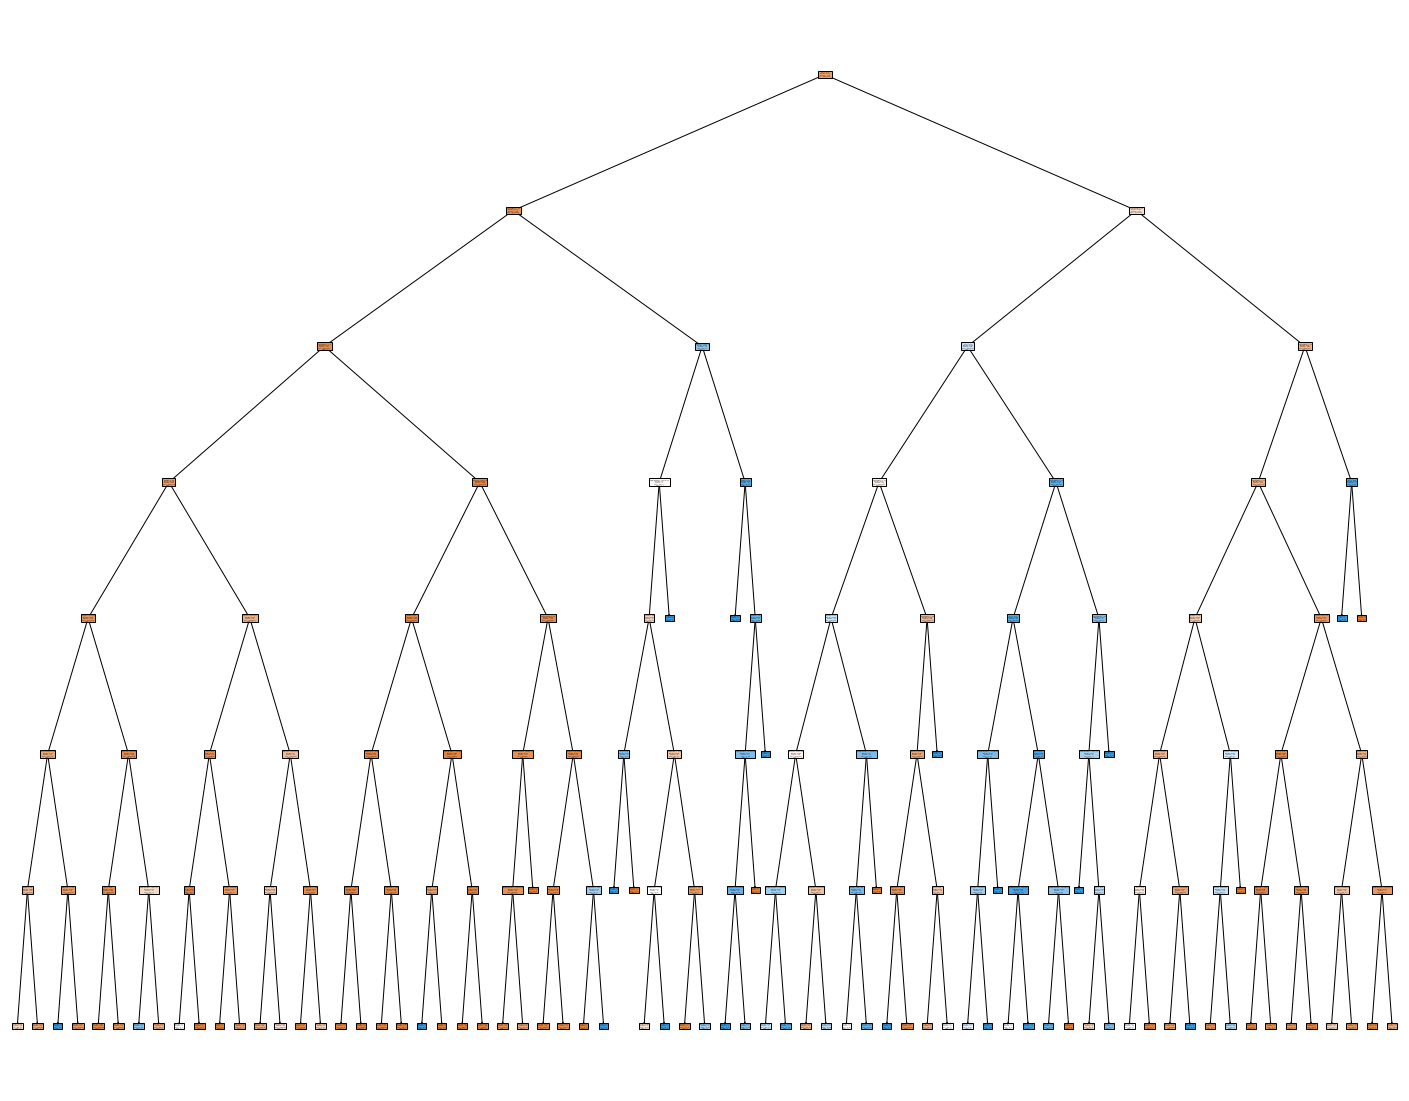

In [81]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model, feature_names = df.drop('Exited', axis=1).columns, class_names = np.unique(df['Exited']).astype('str'), filled = True)

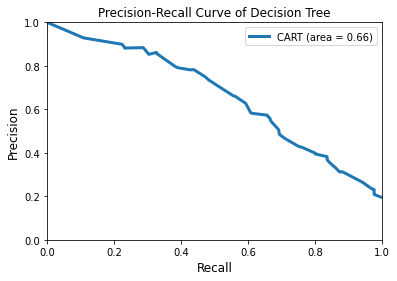

<Figure size 1080x1080 with 0 Axes>

In [91]:
#CART
model_precision, model_recall, threshold = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])
model_f1 = f1_score(y_test, model.predict(X_test))
model_roc_auc = auc(model_recall, model_precision)

# Precision - Recall Curve 
plt.plot(model_recall, model_precision, linewidth = 3,label = 'CART (area = %0.2f)' % model_roc_auc)


plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Recall',fontsize = 12)
plt.ylabel('Precision',fontsize = 12)
plt.title('Precision-Recall Curve of Decision Tree')
plt.legend(loc = "upper right")
plt.figure(figsize = (15,15))
plt.show()

In [82]:
confusion_matrix(y_test, model.predict(X_test))

array([[1898,   75],
       [ 252,  225]], dtype=int64)

In [83]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1973
           1       0.75      0.47      0.58       477

    accuracy                           0.87      2450
   macro avg       0.82      0.72      0.75      2450
weighted avg       0.86      0.87      0.85      2450



**After define max_depth=7, the AUC and recall of Decision Tree are higher than that of LDA. It means Decision Tree is the best model at this time**

**3) DEFINING THRESHOLD**

In [84]:
#Define a function to optimize the threshold
def optimize_threshold(model):
    bestthresh = []
    for i in range(1,101):
        threshold = i/100
        pred = np.where(model.predict_proba(X_test)[:,1] > threshold, 1, 0)
        tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
        recall = tp / (tp + fn)
        precision = tp / (tp + fp)
        accuracy = (tp+tn) / (tn+fp+fn+tp)
        f1 = (2*recall*precision)/(recall+precision)
        if (f1 > 0.48):
            bestthresh.append([recall, f1, accuracy, i/100])
    return bestthresh

In [85]:
a = pd.DataFrame(optimize_threshold(lda), columns=['recall', 'f1', 'accuracy', 'threshold'])
a

<ipython-input-84-2ab11b2426ba>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)
<ipython-input-84-2ab11b2426ba>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)
<ipython-input-84-2ab11b2426ba>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)
<ipython-input-84-2ab11b2426ba>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)
<ipython-input-84-2ab11b2426ba>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)
<ipython-input-84-2ab11b2426ba>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)
<ipython-input-84-2ab11b2426ba>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)
<ipython-input-84-2ab11b2426ba>:9: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (t

,recall,f1,accuracy,threshold
0,0.725367,0.480890,0.695102,0.18
1,0.714885,0.492775,0.713469,0.19
2,0.689727,0.495482,0.726531,0.20
3,0.675052,0.500389,0.737551,0.21
4,0.647799,0.492430,0.740000,0.22
5,0.637317,0.500412,0.752245,0.23
6,0.622642,0.504244,0.761633,0.24
7,0.601677,0.501310,0.766939,0.25
8,0.587002,0.501792,0.773061,0.26
9,0.563941,0.497227,0.777959,0.27


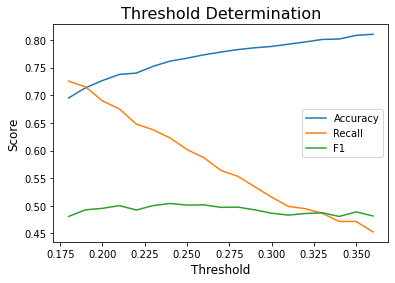

In [86]:
plt.plot(a['threshold'], a['accuracy'], label = 'Accuracy')
plt.plot(a['threshold'], a['recall'], label = 'Recall')
plt.plot(a['threshold'], a['f1'], label = 'F1')
plt.xlabel('Threshold',fontsize = 12)
plt.ylabel('Score',fontsize = 12)
plt.title('Threshold Determination', fontsize = 16)
plt.legend()

**Based on the table and the graph above, we can choose threshold=0.2 to make the trade-off balance between Accuracy and Recall**

*when threshold=0.2*

In [87]:
# keep probabilities for the positive outcome only
yhat = lda.predict_proba(X_test)[:, 1]

#re predict the target value
y1_predict = np.where(yhat>0.2, 1, 0)
y1_predict

array([0, 0, 0, ..., 0, 0, 1])

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

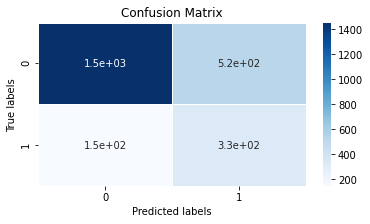

In [88]:
cm = confusion_matrix(y_test, y1_predict)
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm, annot=True, ax = ax,linewidths=.5, cmap='Blues'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [89]:
cm

array([[1451,  522],
       [ 148,  329]], dtype=int64)

In [90]:
print(classification_report(y_test, y1_predict))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1973
           1       0.39      0.69      0.50       477

    accuracy                           0.73      2450
   macro avg       0.65      0.71      0.65      2450
weighted avg       0.81      0.73      0.75      2450



*The recall score has dramatic increase to the value of 0.69, which is 2.5 times higher than the baseline(0.27)*

**Therefore, the LDA with threshold 0.2 and Decision Tree with max_depth 7 are better in terms of recall score**

### In short, there are no perfect models in this dataset. We should understand the business problems to prioritize which statistic (recall) and balance the trade-off. If our entrepreneur prefers max customer exit prediction, we choose LDA threshold. If our boss wants the prediction for customer not exited not too bad we choose tree decision.